Libraries:

In [ ]:
#pip
!pip install ta
!pip install pandas_ta


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=aeba685635bcae304f6c2b49ca9299db9abaa130040cee0e295c43ac03ff608f
  Stored in directory: /root/.cache/pip/wheels/6a/76/03/7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=7e44b273f0f78ab8fefb7b812ac81c75b40b1482fa98c67b97dfcce62e20fa43
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


In [ ]:
 #Imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import ta
import datetime
import pandas_ta as pta


In [ ]:
#Get the stock quote
df = yf.download("BTC-USD", start="2023-2-13", end="2023-4-13", interval='1h')


length = len(df)

#Calculate the EMA values for fast, medium and slow
df['EMAF']=pta.ema(df.Close, length=10)
df['EMAM']=pta.ema(df.Close, length=20)
df['EMAS']=pta.ema(df.Close, length=40)

# Calculate the RSI
rsi = ta.momentum.RSIIndicator(df['Close'])
df['rsi'] = rsi.rsi()

# Calculate the MACD
macd = ta.trend.MACD(df['Close'])
df['macd'] = macd.macd()
df['macd signal'] = macd.macd_signal()
df['macd hist'] = macd.macd_diff()

df['Target Close'] = df['Close'].shift(-1)




#for i in range(length):
  #if df['Volume'][i] == 0:
    #df['Volume'][i] = df['Volume'][i-1]

#df = df.iloc[:-1]
#for i in range(length):
 # print(df.loc[i, 'Volume'])
  #if df.loc[i, 'Volume'] == 0:
   # df.loc[i, 'Volume'] = df.loc[i - 1, 'Volume']

df.dropna(inplace=True)

df = df.drop(['Adj Close', 'Volume'], axis=1)
#print the cvs
df.iloc[:,:]


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,EMAF,EMAM,EMAS,rsi,macd,macd signal,macd hist,Target Close
Datetime,,,,,,,,,,,,
2023-02-14 15:00:00+00:00,22164.140625,22293.140625,21974.539062,22035.814453,21891.119014,21825.593036,21745.510449,61.721306,67.428542,32.174416,35.254127,21995.482422
2023-02-14 16:00:00+00:00,22039.261719,22118.601562,21969.062500,21995.482422,21910.094179,21841.772978,21757.704204,59.322485,72.318667,40.203266,32.115401,22062.750000
2023-02-14 17:00:00+00:00,21999.625000,22084.824219,21999.625000,22062.750000,21937.849783,21862.818408,21772.584487,61.976796,80.691891,48.300991,32.390900,22133.000000
2023-02-14 18:00:00+00:00,22063.142578,22149.150391,22063.142578,22133.000000,21973.331640,21888.549989,21790.165731,64.576446,91.936533,57.028099,34.908433,22211.130859
2023-02-14 19:00:00+00:00,22130.960938,22228.103516,22098.644531,22211.130859,22016.567862,21919.271976,21810.700616,67.257689,105.931388,66.808757,39.122631,22238.103516
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 18:00:00+00:00,30045.923828,30072.042969,29875.796875,29949.052734,30023.155834,30030.960050,29893.961828,47.220745,19.616641,45.929057,-26.312416,29806.281250
2023-04-12 19:00:00+00:00,29938.935547,29960.941406,29806.281250,29806.281250,29983.724092,30009.562069,29889.684726,41.141905,0.468830,36.837012,-36.368182,29961.841797
2023-04-12 20:00:00+00:00,29800.476562,29961.841797,29790.916016,29961.841797,29979.745493,30005.017281,29893.204583,48.865887,-2.128971,29.043815,-31.172786,29951.941406


In [ ]:
#Get the number of columns and rows
df.shape

(1355, 12)

# **FUNCTIONS**

In [ ]:
length = len(df)
high = list(df['High'])
low = list(df['Low'])
close = list(df['Close'])
open = list(df['Open'])

rsi = list(df['rsi'])
macd = list(df['macd'])
macd_signal = list(df['macd signal'])
macd_hist = list(df['macd hist'])

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length


# 1 = Bearish
# 2 = Bull
# 3 = stronger Bearish
# 4 = stronger Bull

#Går ut i fra at prisforsjell på 28$ ca. 1% er nokk

#Bearish engoulfing

bodydiff = [0] * length


#is_green[row] = close[row] > open[row]
#is_red[row] = close[row] < open[row]
#is_inside = high[row - 1] < open[row] and low[row - 1] > close[row]
#is_bigger = bodydiff[row] > bodydiff[row -1]
#opened_higher = (open[row] - close[row - 1])>=-0e-5
#opened_lower = (open[row] - close[row - 1])<= 0e-5
#closed_higher = close[row] > open[row - 1]
#closed_lower = close[row] < open[row - 1]

def is_engulfing(n):
  row = n
  bodydiff[row] = abs(open[row] - close[row])
  if bodydiff[row] < 0.001:
    bodydiff[row] = 0.001

  bodydiffmin = 28 #ca 1% av bitcoin i $
  #Beaish pattern
  if (close[row - 1] > open[row - 1] and close[row] < open[row] and
      bodydiff[row] > bodydiffmin and
      bodydiff[row-1] > bodydiffmin and bodydiff[row] > bodydiff[row-1]
      and (open[row] - close[row - 1])>=-0e-5 and close[row] < open[row - 1]):
    return 1 #BEARISH
  elif (close[row] > open[row] and close[row - 1] < open[row - 1] and
        bodydiff[row] > bodydiffmin and
        bodydiff[row-1]> bodydiffmin and bodydiff[row] > bodydiff[row-1] and
        (open[row] - close[row - 1])<= 0e-5 and close[row] > open[row - 1]):
    return 2 #BULLISH
  else:
    return 0


#prøv å få med uptrend eller downtrend i kalkulasjonene


def is_hammer_or_star(n):
  row = n
  bodydiffmin = 28 #ca 1% av bitcoin i $
  bodydiff[row] = abs(open[row] - close[row])

  highdiff[row] = high[row] - max(open[row], close[row])
  lowdiff[row] = min(open[row], close[row]) - low[row]

  ratio1[row] = highdiff[row]/bodydiff[row]
  ratio2[row] = lowdiff[row]/bodydiff[row]

  if bodydiff[row] < 0.001:
    bodydiff[row] = 0.001

  if (ratio1[row - 1]>1.4 and lowdiff[row-1]< 0.15*highdiff[row-1] and bodydiff[row-1] > bodydiffmin and open[row-1] < close[row-1]
      and close[row] > (high[row-1]-(highdiff[row-1]/2))):
    return 2 # STRONG Bullish inverted hammer
  elif (ratio1[row-1]>1.4 and lowdiff[row-1]< 0.15*highdiff[row-1] and bodydiff[row-1] > bodydiffmin and close[row] > (high[row-1]-(highdiff[row-1]/2))):
    return 2 # Bullish inverted hammer
  elif (ratio2[row -1] >1.4 and highdiff[row-1]< 0.15*lowdiff[row-1] and bodydiff[row-1] > bodydiffmin and close[row-1]>open[row-1]
        and close[row] > (high[row-1]-(highdiff[row-1]/2))):
    return 2 #Strong Bullish Hammer
  elif (ratio2[row -1] >1.4 and highdiff[row-1]< 0.15*lowdiff[row-1] and bodydiff[row-1] > bodydiffmin
        and close[row] > (high[row-1]-(highdiff[row-1]/2))):
    return 2 #Bullish Hammer

  elif (ratio1[row - 1]>1.4 and lowdiff[row-1]< 0.15*highdiff[row-1] and bodydiff[row-1] > bodydiffmin and open[row-1] > close[row-1]
        and close[row] < low[row-1]):
    return 1 #Strong bearish shooting star
  elif (ratio1[row - 1]>1.4 and lowdiff[row-1]< 0.15*highdiff[row-1] and bodydiff[row-1] > bodydiffmin
        and close[row] < low[row-1]):
    return 1 #bearish shooting star
  else:
    return 0







#Lag til egne funksjoner
def MACD_value(n):
  row = n
  if macd[row - 1] < macd_signal[row - 1] and macd_hist[row - 1] < macd_hist[row-2]:
    return 1
  elif macd[row - 1] > macd_signal[row - 1] and macd_hist[row - 1] > 0:
    return 2
  else:
    return 0


def RSI_value(n):
  row = n
  if rsi[row] >= 70:
    return 1
  elif rsi[row] <= 30:
    return 2
  else:
    return 0






a = 0
b = 0
c = 0
for n in range(length):
  if is_engulfing(n) == 1:
    a +=1
  elif is_engulfing(n) ==2:
    b+=1
  else:
    c+=1

a = [1, a]
b = [2, b]
c = [0, c]




In [ ]:
sig = []
dates = []

for n in range(length):
  if is_engulfing(n) == 1 or is_hammer_or_star(n) == 1:
    dates.append(df.index[n])
    sig.append(1)
  elif is_engulfing(n) == 2 or is_hammer_or_star(n) == 2:
    dates.append(df.index[n])
    sig.append(2)


ef = pd.DataFrame({'Dates': dates, 'Signals': sig})
ef.columns = ['Date', 'Signal']

# Define a function to set the background color of each row based on its values
def set_row_color(row):
    if row['Signal'] > 1:
        return ['background-color: green']*len(row)
    else:
        return ['background-color: red']*len(row)

# Apply the function to the DataFrame and display it with CSS styles
styled_ef = ef.style.apply(set_row_color, axis=1)
display(styled_ef)

,Date,Signal
0,2023-02-16 04:00:00+00:00,1
1,2023-02-16 18:00:00+00:00,2
2,2023-02-17 04:00:00+00:00,1
3,2023-02-17 09:00:00+00:00,2
4,2023-02-17 13:00:00+00:00,1
5,2023-02-18 00:00:00+00:00,2
6,2023-02-18 19:00:00+00:00,1
7,2023-02-20 20:00:00+00:00,1
8,2023-02-20 23:00:00+00:00,2
9,2023-02-21 10:00:00+00:00,1


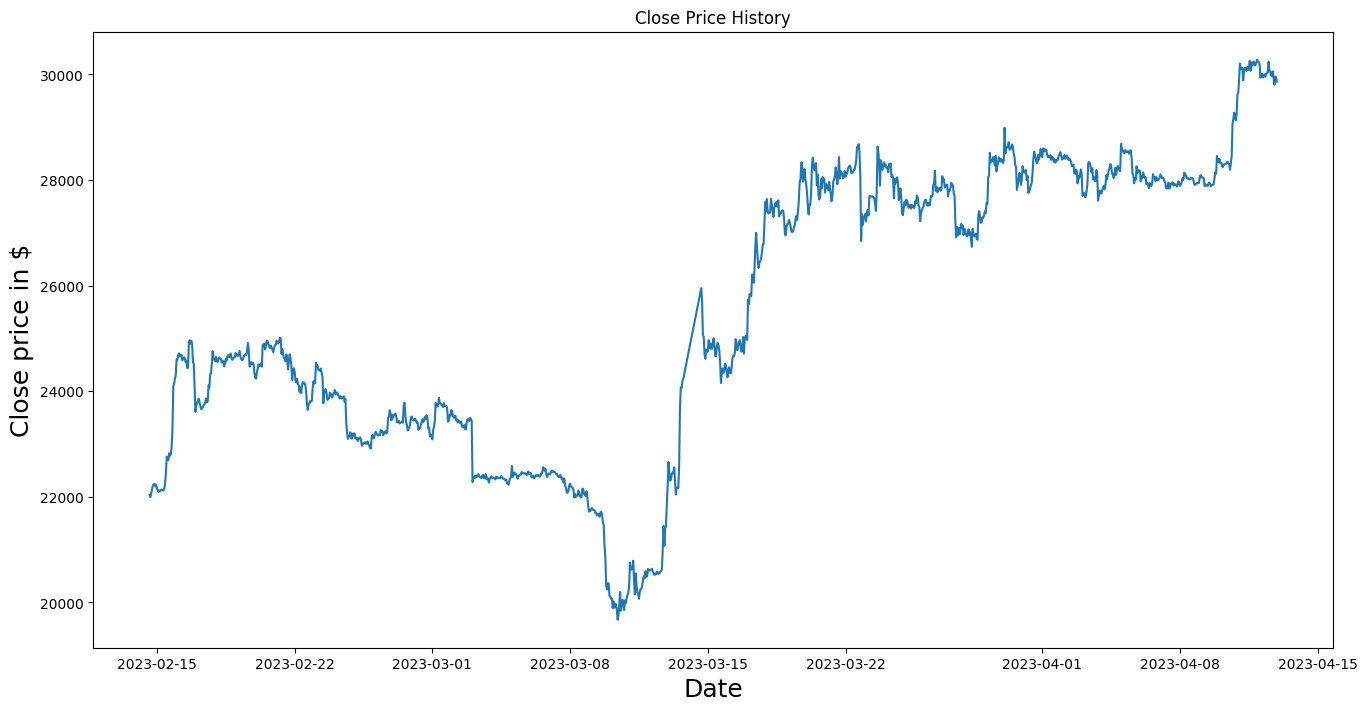

In [ ]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close price in $", fontsize=18)
plt.show()

[link text](https://)# **Checking when the stock was at a cirten price:**

First we make a new dataframe called v2_df. In this dataframe we only see the dates and closing prices. The closing prices are all rounded down to the closest interger.

In [ ]:
v2_df = df.drop(['Open', 'High', 'Low', 'rsi', 'macd', 'macd signal', 'macd hist', 'EMAF', 'EMAM', 'EMAS', 'Target Close'], axis=1)
v2_df['Close'] = v2_df['Close'].apply(lambda x: math.floor(x))
v2_df


,Close
Datetime,
2023-02-14 15:00:00+00:00,22035
2023-02-14 16:00:00+00:00,21995
2023-02-14 17:00:00+00:00,22062
2023-02-14 18:00:00+00:00,22133
2023-02-14 19:00:00+00:00,22211
...,...
2023-04-12 18:00:00+00:00,29949
2023-04-12 19:00:00+00:00,29806
2023-04-12 20:00:00+00:00,29961


In [ ]:
def when_was_price_x(price):
    # Find the row(s) with the desired 'Close' value
    search_value = price
    row = v2_df.loc[v2_df['Close'] == search_value]

    # Check if the resulting DataFrame is empty
    if row.empty:
        return "No rows found with Close value of {}".format(price)

    # Print the date and time for the first row
    return row.index[0]

# Example usage
print(when_was_price_x(30011))


No rows found with Close value of 30011


# **Training the model:**

In [ ]:
dataset = df.values

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(dataset)
data_scaled

array([[0.23495878, 0.23410772, 0.220918  , ..., 0.37184254, 0.4850246 ,
        0.21890817],
       [0.22319504, 0.21783715, 0.22040115, ..., 0.37811257, 0.47847226,
        0.22525053],
       [0.21946122, 0.21468842, 0.22328547, ..., 0.38443639, 0.47904738,
        0.2318741 ],
       ...,
       [0.95431024, 0.94898595, 0.95858593, ..., 0.36939773, 0.34635306,
        0.96908776],
       [0.96999933, 0.952956  , 0.97146014, ..., 0.36409147, 0.35469064,
        0.96092248],
       [0.96992813, 0.94969275, 0.96396104, ..., 0.3584335 , 0.35092988,
        0.96345125]])

In [ ]:
print(data_scaled.shape)
print(data_scaled.shape[0])
backcandles = 168

X = []

for j in range(8): #8, because there are 8 coloums each row going into the training, not inc macd
  X.append([])
  for i in range(backcandles, data_scaled.shape[0]):
    X[j].append(data_scaled[i-backcandles:i, j])

print(np.shape(X))

y = []
for i in range(backcandles, data_scaled.shape[0]):
    y.append(data_scaled[i, 3]) # index 3 is the Close column

Z=[]
for j in range(8): #8, because there are 8 coloums each row going into the training, not inc macd
  Z.append([])
  for i in range(backcandles, dataset.shape[0]+2):
    Z[j].append(dataset[i-backcandles:i, j])

print(np.shape(Z))
Z = np.array(Z)
print("i")
print(Z[0])
print("i")
print(Z[1])
X = np.moveaxis(X, [0], [2])
print(np.shape(X))

#training_data_len = math.ceil(len(dataset)*0.7)

#training_data_len #Uses 80% of the data set to train the model


(1355, 12)
1355
(8, 1187, 168)
(8, 1189)
i
[array([22164.140625  , 22039.26171875, 21999.625     , 22063.14257812,
        22130.9609375 , 22210.52734375, 22239.86523438, 22247.00585938,
        22200.24023438, 22220.5859375 , 22158.92382812, 22132.40820312,
        22094.14257812, 22115.42773438, 22106.26171875, 22136.11914062,
        22135.09765625, 22127.08789062, 22119.22460938, 22174.58984375,
        22247.78320312, 22451.30078125, 22765.140625  , 22721.91210938,
        22708.76953125, 22820.99023438, 22779.51757812, 22800.4921875 ,
        22961.14648438, 23281.53125   , 24097.12109375, 24146.56445312,
        24204.74804688, 24307.34960938, 24596.3828125 , 24615.98046875,
        24690.609375  , 24721.4296875 , 24658.03320312, 24680.45703125,
        24631.99023438, 24584.78515625, 24590.96289062, 24644.11523438,
        24624.31054688, 24561.890625  , 24588.21679688, 24448.31054688,
        24428.66796875, 24981.46875   , 24945.65234375, 24894.6953125 ,
        24956.5644531

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
<ipython-input-13-2c9d848d265f>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z = np.array(Z)


In [ ]:
#Splitting into train and test

#print(np.shape(X_train))
#print(np.shape(X_test))

X, yi = np.array(X), np.array(data_scaled[backcandles:,:8])
print(np.shape(yi))
y=np.reshape(yi,(len(yi),backcandles,8))



#print(X)
#print(X.shape)
#print(y)
print(y.shape)

#Split into train and test
train_data_len = math.ceil(len(dataset)*0.7)
X_train, X_test = X[ :train_data_len], X[train_data_len: ]


y = np.array(y).reshape(-1, 1)
y_train, y_test = y[ :train_data_len], y[train_data_len: ]

print('X_train =',  X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)


(1187, 8)


ValueError: ignored

# Build the LSTM model with many features

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

#Build the LSTM model

#model = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # X_train.shape[1] = 168 , X_train.shape[2] = 8
#model.add(LSTM(units=50, return_sequences=False))
#model.add(Dense(units=1))
#model.compile(optimizer='adam', loss='mse')


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2)) # Dropout means, 20% of random nuerans are droped to force the model to learn how  to predict.
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32)

predicted_closing_price = model.predict(X_test)
print(predicted_closing_price.shape)
#predicted_closing_price = predicted_closing_price.reshape(predicted_closing_price.shape[0],)
print(predicted_closing_price.shape)

print(predicted_closing_price)

#lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
#inputs = LSTM(150, name='first_layer')(lstm_input)
#inputs = Dense(1, name='dense_layer')(inputs)
#output = Activation('linear', name='output')(inputs)
#model = Model(inputs=lstm_input, outputs=output)
#adam = optimizers.Adam()

#Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.fit(x=X_train, y=y_train, batch_size=15, epochs=5, shuffle=True, validation_split = 0.1)


In [ ]:
predicted_closing_price = predicted_closing_price.reshape(predicted_closing_price.shape[0], 1)
print(predicted_closing_price.shape)


predicted_price_scaled = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_closing_price)
print(predicted_price)

In [ ]:
print(test_loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
last_candles = data_scaled[-168:, :]
print(last_candles.shape)
last_candles = np.reshape(last_candles, (1, 168, 8))
next_price = model.predict(last_candles)

print(next_price)


In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

In [ ]:
#Plotting
plt.figure(figsize=(16,8))
plt.plot(y_train, color = 'green', label = 'train')
plt.plot(y_test, color = 'red', label = 'train')
plt.plot(y_pred, color = 'green', label = 'pred')

plt.legend()
plt.show()

In [ ]:
#@title Default title text
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train

X_train = []
y_train = []

for i in range(96, len(train_data)):
  X_train.append(train_data[i-96:i, 0])
  y_train.append(train_data[i, 0])
  print(y_train)
  if i<=96:
    print(X_train)
    print(i)
    print(y_train)

In [ ]:
#Convert the x_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape[0]

In [ ]:
#Reshape the data, using .shape[0] and [1] to make the 3d array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) ### Learn what LSTM DOES

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 4164 to 5280
test_data = scaled_data[training_data_len - 96: , :]
#Create the data sets x_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(96, len(test_data)):
  X_test.append(test_data[i-96:i, 0])


In [ ]:
#Convert the data to a numpy array
X_test = np.array(X_test)


In [ ]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price BTC in USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

In [ ]:
#Get the quote, predicting the future
btc_quote = yf.download("BTC-USD", start="2023-3-10", end="2023-4-7", interval='15m')
#Create a new dataframe
new_df = btc_quote.filter(['Close'])
#Get the last 1 days closing values and convert the dataframe to an array
last_1_day = new_df[-96:].values
#Scale the data to be values between 0 and 1
last_1_day_scaled = scaler.transform(last_1_day)
#Create an empty list
x_test = []
#Append he past 1 day
x_test.append(last_1_day_scaled)
#Convert the X_test data to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



In [ ]:
#Get the quote, predicting the future
btc_quote2 = yf.download("BTC-USD", start="2023-4-6", end="2023-4-7", interval='15m')
print(btc_quote2['Close'][-1])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# load the data
df = yf.download("BTC-USD", start="2023-2-8", end="2023-4-7", interval='15m')

# add volume as a factor
df['Volume_factor'] = df['Volume'] / df['Volume'].mean()

# split the data into train and test sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size, :]
test_data = df.iloc[train_size:, :]

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Close', 'Volume_factor']])
test_scaled = scaler.transform(test_data[['Close', 'Volume_factor']])

# create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# create the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_length, 2)))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# make predictions
y_pred = model.predict(X_test)




In [ ]:
y_pred = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((seq_length, 1))), axis=0))[:-seq_length, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((seq_length, 1))), axis=0))[:-seq_length]

# plot the predictions and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# Testing buy and sell

In [ ]:
money = 1000
gamble = 0.10
wallet = 0

def buy_sell():
  if ef.loc['Signal'] == 1:
